# **Below code to undestand Python and its libraries by example::: simulates motor sensor data and saves it to a CSV file named motor_sensor_data.csv.**

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import random

# Configuration for data generation
num_records = 1000
start_time = datetime.now()
time_interval = timedelta(seconds=10)

# Data holders - lists to store the generated data
timestamps = []
motor_temp = []
motor_vibration = []
motor_current = []
motor_rpm = []
status = []

# Function to classify motor status based on sensor values
def classify_status(temp, vib, curr):
    if temp > 80 or vib > 5.0 or curr > 18:
        return 2  # Faulty status
    elif temp > 70 or vib > 3.5 or curr > 16:
        return 1  # Warning status
    else:
        return 0  # Healthy status

# Simulate Data generation
for i in range(num_records):
    timestamps.append(start_time + i * time_interval)

    # Simulate sensor data with small randomness
    temp = np.random.normal(loc=65, scale=10)  # Simulate temperature with mean 65°C and std dev 10
    vib = np.random.normal(loc=2.0, scale=1.0)  # Simulate vibration with mean 2 mm/s and std dev 1
    curr = np.random.normal(loc=12, scale=4)  # Simulate current with mean 12 A and std dev 4
    rpm = np.random.normal(loc=1500, scale=200)  # Simulate RPM with mean 1500 and std dev 200

    # Occasionally inject faults into the data
    if i % 250 == 0:
        temp += random.randint(20, 30) # Increase temp to simulate fault
        vib += random.uniform(2.0, 3.0) # Increase vibration to simulate fault
        curr += random.uniform(5.0, 7.0) # Increase current to simulate fault

    # Append rounded sensor values and calculated status to lists
    motor_temp.append(round(temp, 2))
    motor_vibration.append(round(vib, 2))
    motor_current.append(round(curr, 2))
    motor_rpm.append(int(rpm))
    status.append(classify_status(temp, vib, curr))

# Create DataFrame from the simulated data
df = pd.DataFrame({
    'timestamp': timestamps,
    'motor_temp': motor_temp,
    'motor_vibration': motor_vibration,
    'motor_current': motor_current,
    'motor_rpm': motor_rpm,
    'status': status
})

# Save the DataFrame to a CSV file
df.to_csv(r'motor_sensor_data.csv', index=True)
print("✅ Sensor data saved to 'motor_sensor_data.csv'")

# Redefining the classify_status function (already defined above, can be removed)
def classify_status(temp, vib, curr):
    if temp > 80 or vib > 5.0 or curr > 18:
        return 2  # Faulty
    elif temp > 70 or vib > 3.5 or curr > 16:
        return 1  # Warning
    else:
        return 0  # Healthy

✅ Sensor data saved to 'motor_sensor_data.csv'


# **Below code loads the simulated motor sensor data from the CSV file and creates a time series plot of the sensor values.**

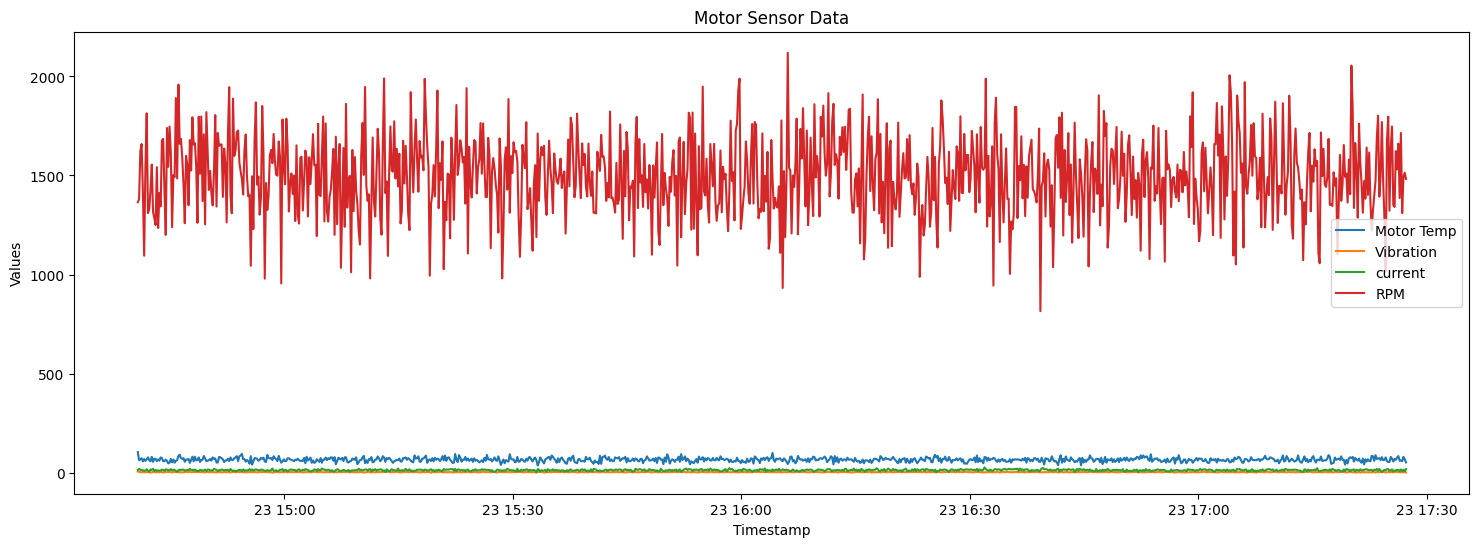

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv("motor_sensor_data.csv")

# Convert the 'timestamp' column to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a figure for the plot with a specified size
plt.figure(figsize=(18,6))

# Plot each sensor value against the timestamp
plt.plot(df['timestamp'], df['motor_temp'], label='Motor Temp')
plt.plot(df['timestamp'], df['motor_vibration'], label='Vibration')
plt.plot(df['timestamp'], df['motor_current'], label='current')
plt.plot(df['timestamp'], df['motor_rpm'], label='RPM')

# Add labels and title to the plot
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Motor Sensor Data')

# Add a legend to identify each line
plt.legend()

# Display the plot
plt.show()

# **Below code performs several data analysis and visualization tasks on the motor sensor data, including summary statistics, time-series plots, a correlation heatmap, and a pie chart of the motor health status distribution.**

        Unnamed: 0                      timestamp   motor_temp  \
count  1000.000000                           1000  1000.000000   
mean    499.500000  2025-07-22 11:54:57.178997760    65.128840   
min       0.000000     2025-07-22 10:31:42.178998    33.090000   
25%     249.750000  2025-07-22 11:13:19.678998016    58.347500   
50%     499.500000  2025-07-22 11:54:57.178998016    65.265000   
75%     749.250000  2025-07-22 12:36:34.678998016    71.705000   
max     999.000000     2025-07-22 13:18:12.178998   100.170000   
std     288.819436                            NaN    10.055196   

       motor_vibration  motor_current    motor_rpm       status  
count      1000.000000    1000.000000  1000.000000  1000.000000  
mean          2.002260      12.180330  1502.324000     0.591000  
min          -1.220000      -1.900000   832.000000     0.000000  
25%           1.340000       9.577500  1370.750000     0.000000  
50%           2.025000      12.195000  1498.500000     0.000000  
75%      

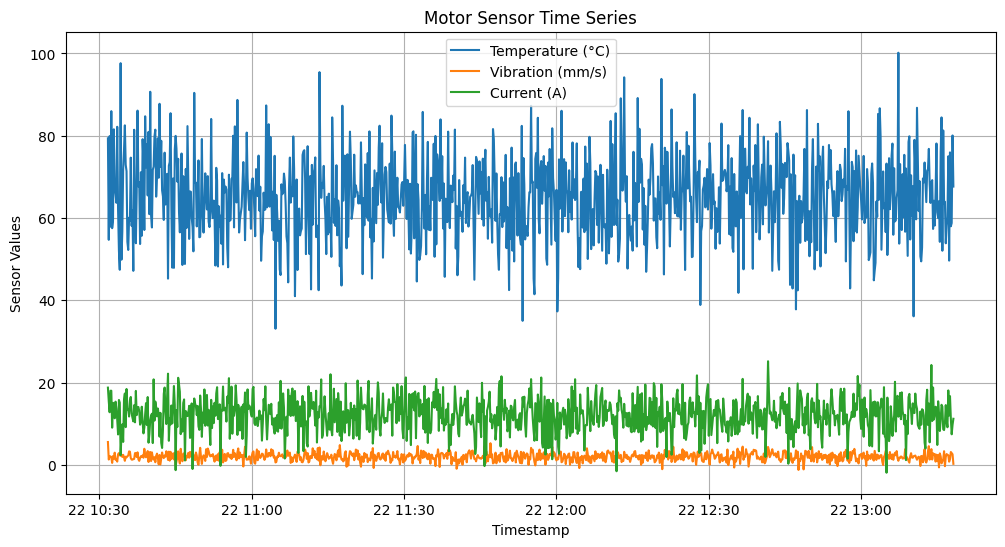

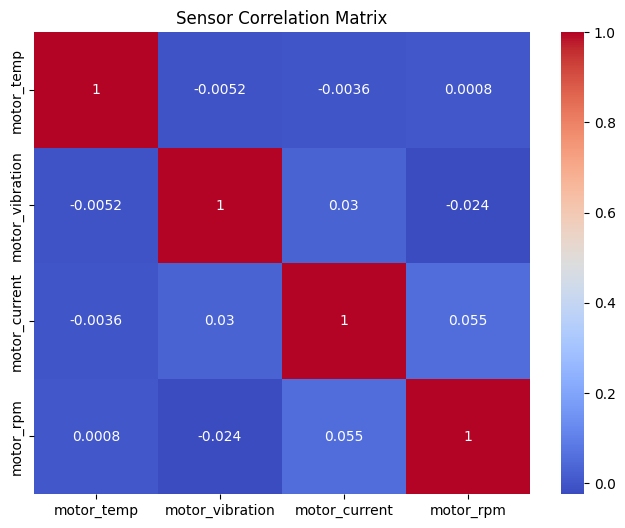

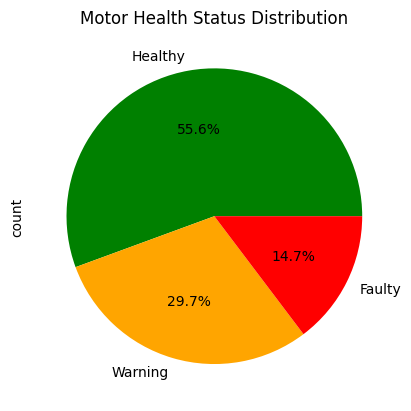

In [6]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load CSV
df = pd.read_csv("/content/drive/MyDrive/motoror_sensor_data.csv") # Load data from CSV
df['timestamp'] = pd.to_datetime(df['timestamp']) # Convert timestamp column to datetime objects

# Step 3: Summary statistics
print(df.describe()) # Print descriptive statistics of the DataFrame
print("\nStatus counts:\n", df['status'].value_counts()) # Print the counts of each status category

# Step 4: Time-series plots
plt.figure(figsize=(12, 6)) # Create a figure for the time series plot
plt.plot(df['timestamp'], df['motor_temp'], label='Temperature (°C)') # Plot temperature over time
plt.plot(df['timestamp'], df['motor_vibration'], label='Vibration (mm/s)') # Plot vibration over time
plt.plot(df['timestamp'], df['motor_current'], label='Current (A)') # Plot current over time
plt.xlabel("Timestamp") # Set x-axis label
plt.ylabel("Sensor Values") # Set y-axis label
plt.title("Motor Sensor Time Series") # Set plot title
plt.legend() # Add a legend
plt.grid() # Add a grid
plt.show() # Display the plot

# Step 5: Correlation heatmap
plt.figure(figsize=(8, 6)) # Create a figure for the heatmap
sns.heatmap(df[['motor_temp', 'motor_vibration', 'motor_current', 'motor_rpm']].corr(), annot=True, cmap='coolwarm') # Create a heatmap of sensor correlations
plt.title("Sensor Correlation Matrix") # Set heatmap title
plt.show() # Display the heatmap

# Step 6: Status distribution pie chart
df['status'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Healthy', 'Warning', 'Faulty'], colors=['green', 'orange', 'red']) # Create a pie chart of status distribution
plt.title("Motor Health Status Distribution") # Set pie chart title
plt.show() # Display the pie chart

Explanation of the output:

### ## Summary Statistics (df.describe()): This part provides descriptive statistics for the numerical columns in the DataFrame (Unnamed: 0, motor_temp, motor_vibration, motor_current, motor_rpm, and status).
count: The number of non-null entries in each column (1000 in this case, as we generated 1000 records).
mean: The average value for each sensor reading and the status.
min: The minimum value recorded for each sensor reading and status.
25% (1st quartile): The value below which 25% of the data falls.
50% (median): The middle value of the dataset.
75% (3rd quartile): The value below which 75% of the data falls.
max: The maximum value recorded for each sensor reading and status.
std: The standard deviation, which measures the spread or dispersion of the data.
timestamp: For the timestamp column, it shows the count, mean (which is the average timestamp), min, max, and standard deviation (which is NaN because standard deviation is not applicable to datetime objects in this context).
Status Counts (df['status'].value_counts()): This part shows the distribution of the motor health status:
status 0: Represents 'Healthy' status, with a count of 556.
status 1: Represents 'Warning' status, with a count of 297.
status 2: Represents 'Faulty' status, with a count of 147.
In addition to this printed output, the code also generated three plots:

Motor Sensor Time Series Plot: This plot shows how the temperature, vibration, current, and RPM change over time. You can visually inspect trends, anomalies, or patterns in the sensor readings.
Sensor Correlation Matrix Heatmap: This heatmap visualizes the correlation between the different sensor readings. A value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value close to 0 indicates little to no correlation. This can help identify if certain sensor readings tend to increase or decrease together.
Motor Health Status Distribution Pie Chart: This pie chart shows the proportion of time the motor spent in each status (Healthy, Warning, and Faulty). This provides a quick overview of the motor's overall health during the simulated period.
These outputs provide valuable insights into the simulated motor sensor data, helping to understand the data's characteristics and the distribution of motor health statuses.